<a href="https://colab.research.google.com/github/Nas-Dam/Pandas-Data-Science-Tasks/blob/master/Practice_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import os
import glob
from matplotlib import pyplot as plt

In [19]:
path = r"/content/drive/MyDrive/Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)



In [3]:
all_months_data = pd.read_csv("all_data_copy.csv")
df = all_months_data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [4]:
#### Question 1: What was the best month for sales? How much was earned that month?

####Question 1: What was the best month for sales? How much was earned that month?

In [5]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [6]:
df['Months'] = df['Order Date'].str[0:2]
df = df.dropna(how = 'all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [7]:
df = df[df['Order Date'].str[0:2] != 'Or']

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [8]:
df['Months'] = df['Months'].astype('int64')

In [9]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float64')

In [10]:
df['Total Price'] = df['Quantity Ordered'] * df['Price Each']

In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Price
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [12]:
results = df.groupby('Months').sum()
results

,Quantity Ordered,Price Each,Total Price
Months,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Text(0, 0.5, 'Sales in million usd($)')

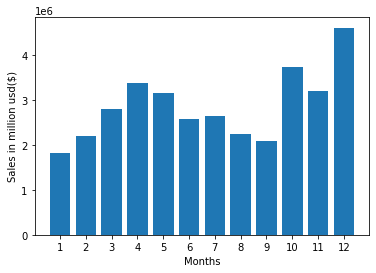

In [13]:
month = range(1,13)
plt.bar(month, results['Total Price'])
plt.xticks(month)
plt.xlabel("Months")
plt.ylabel("Sales in million usd($)")


Text(0, 0.5, 'Sales in million usd($)')

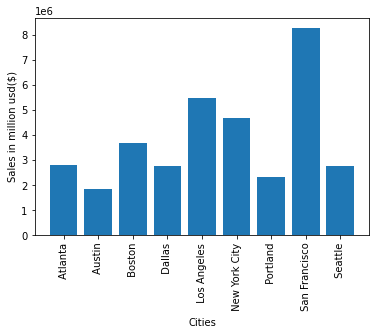

In [14]:
df['City'] = df['Purchase Address'].str.split(",", n = -1, expand = False)
df['City'] = df['City'].str[1]




results = df.groupby('City').sum()
cities = [city for city, df in df.groupby('City')]
Sales = results['Total Price']

plt.bar(cities, Sales)
plt.xticks(cities, rotation = 90)
plt.xlabel('Cities')
plt.ylabel('Sales in million usd($)')

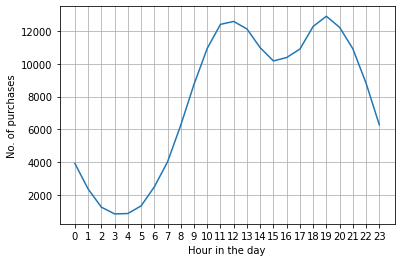

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df
hours = [hour for hour, df in df.groupby('Hour')]

Purchase = df.groupby(['Hour']).count()

plt.plot(hours ,Purchase['Quantity Ordered'])

plt.xticks(hours)
plt.xlabel('Hour in the day')
plt.ylabel('No. of purchases')
plt.grid()

What products sold the most? Why do you think they sold the most?

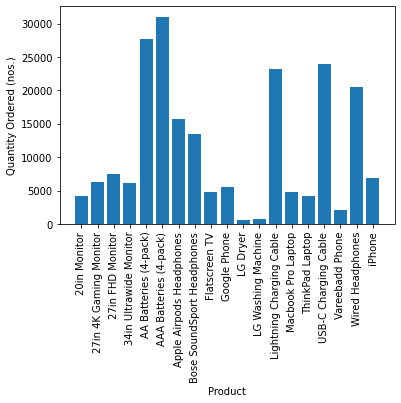

In [26]:
products = [product for product, df in df.groupby('Product')]
count = df.groupby('Product').sum()
plt.bar(products, count['Quantity Ordered'])
plt.xticks(products,rotation = 'vertical')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered (nos.)')
plt.show()